# Model predykcyjny: klasyfikacja klientów
W tym notebooku budujemy model klasyfikacyjny, który na podstawie danych RFM przewiduje, czy klient należy do segmentu **Top Spenders**.

**Dane wejściowe:** `Recency`, `Frequency`, `Monetary`
**Etykieta (target):** `SpenderSegment == 'Top'`

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Wczytanie danych RFM
rfm = pd.read_csv('../data/rfm.csv')  # <-- zamień na swoją ścieżkę jeśli trzeba

In [4]:
# Tworzymy zmienną binarną: 1 = Top spender (górne 33%), 0 = reszta
threshold = rfm["Monetary"].quantile(0.67)
rfm["IsTopSpender"] = (rfm["Monetary"] >= threshold).astype(int)

# Sprawdzenie rozkładu etykiety
rfm["IsTopSpender"].value_counts()


0    120
1     59
Name: IsTopSpender, dtype: int64

In [5]:
# Przygotowanie zmiennych X (cechy) i y (etykieta)
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['IsTopSpender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Budowa modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predykcja i ocena
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Wizualizacja ważności cech
Analizujemy, które cechy (R, F, M) mają największy wpływ na predykcję klasyfikatora.
Używamy do tego wbudowanego atrybutu `.feature_importances_` z modelu Random Forest.

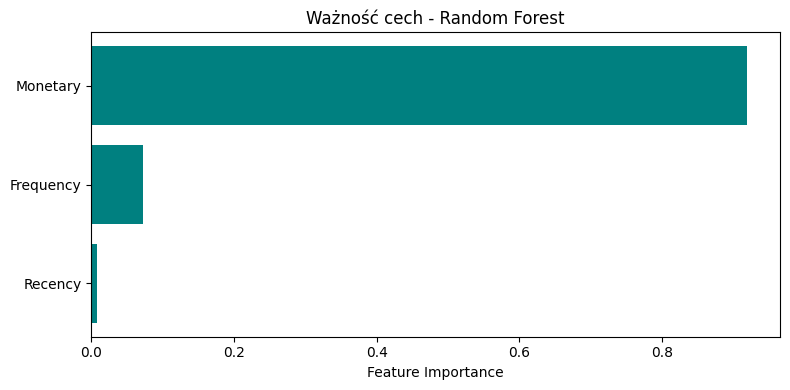

In [8]:
import matplotlib.pyplot as plt

# Ważność cech
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='teal')
plt.xlabel("Feature Importance")
plt.title("Ważność cech - Random Forest")
plt.tight_layout()
plt.show()

## Macierz pomyłek (confusion matrix)
Macierz pomyłek pokazuje, ilu klientów zostało poprawnie zaklasyfikowanych do klasy 0 i 1 oraz ile razy model się pomylił.

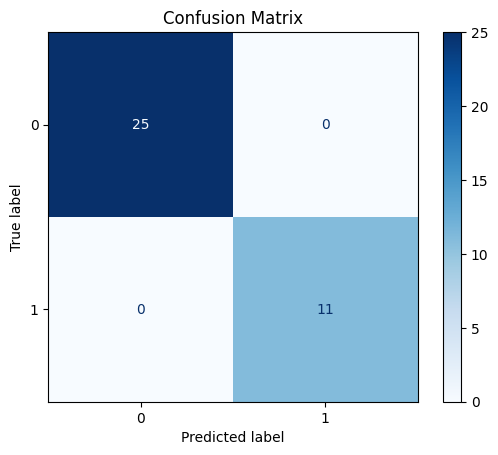

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()